WEB SCRAPPING


In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/island-of-fire-city-sivakasi-sivakasi-550626"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food Name","Price"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('h3', class_="styles_itemNameText__3ZmZZ")
  price = item.find('div', class_="styles_itemPortionContainer__1u_tj")
  
  
  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)

<Response [200]>


In [6]:
# import pandas and read the cse file
import pandas as pd 
data = pd.read_csv("food.csv")

HISTORGAM

<function matplotlib.pyplot.show(*args, **kw)>

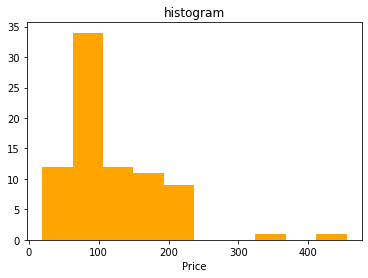

In [7]:
import matplotlib.pyplot as plt
x = data.Price
y = data.Food_Name
plt.hist(x,color="orange")
plt.xlabel("Price")
plt.title("histogram")
plt.show

BOX PLOT

<function matplotlib.pyplot.show(*args, **kw)>

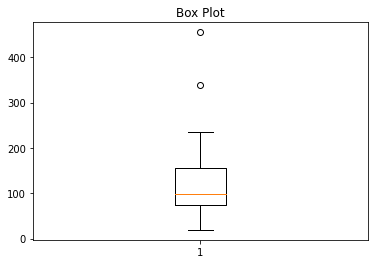

In [8]:
#Box plot
import matplotlib.pyplot as plt
items = [data.Price ]
plt.boxplot(items)
plt.title("Box Plot")
plt.show 

STEP PLOT

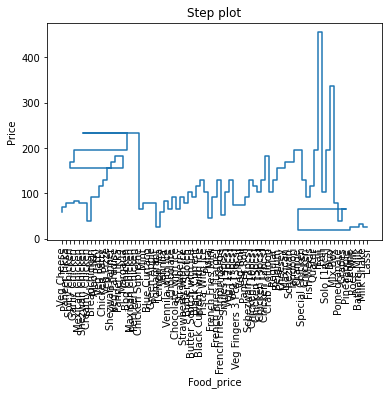

In [9]:
import matplotlib.pyplot as plt
y = data.Price
x = data.Food_Name
plt.step(x,y)
plt.title("Step plot")
plt.ylabel("Price")
plt.xticks(rotation='vertical')
plt.xlabel("Food_price")
plt.show()

In [10]:
import plotly.express as px
 
fig = px.pie(data, values="Price", names="Food_Name",
             title='Food Dataset', hover_data=['S.No'])
fig.show()

BAR PLOT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



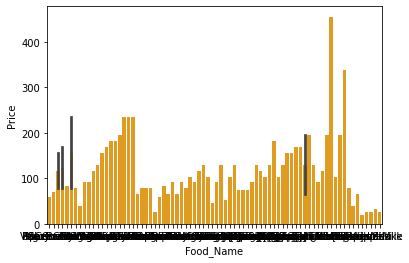

In [11]:
# bar plot
import seaborn as sns
x = data.Food_Name
y = data.Price
sns.barplot(x,y,color="orange")


JOINT PLOT

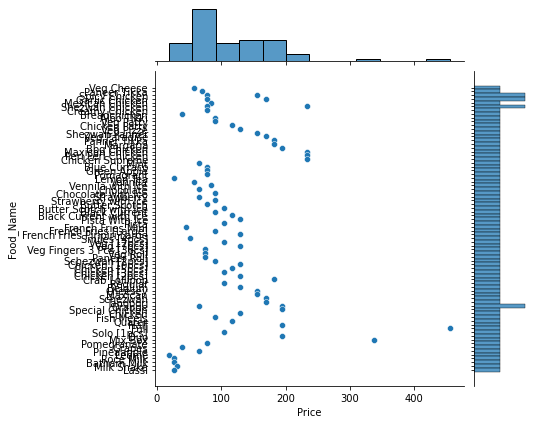

In [12]:
sns.jointplot(x='Price', y='Food_Name', data=data)
plt.show()

HEAT MAP

Text(0.5, 1.0, 'Heatmap')

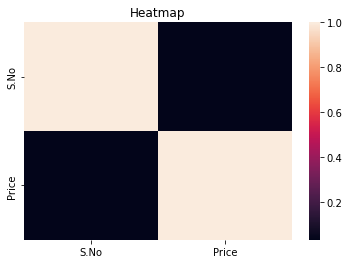

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
# first five entries of the tips dataset
data.head()
 
# correlation between the different parameters
tc = data.corr()
 
# plot a heatmap of the correlated data
sns.heatmap(tc)
plt.title("Heatmap")

KDE plot

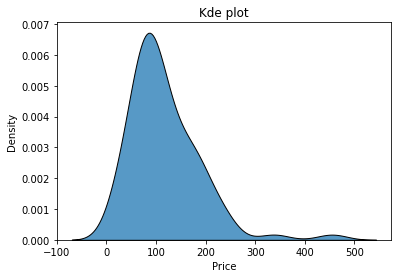

In [15]:
plt.title("Kde plot")
sns.kdeplot(data=data,x='Price',multiple='stack')
plt.show()

SCATTER


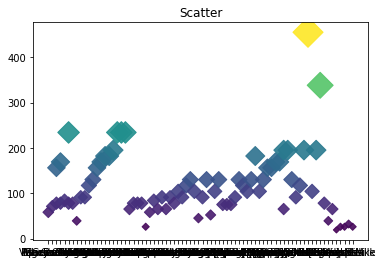

In [19]:
plt.title("Scatter")
plt.scatter(x , y, s=data['Price'], c=data['Price'], marker='D', alpha=0.9)